## Chapter 1.8: Onlap relationships
***
In some geologic cases we want to represent an onlap relationship, where layers deposited onto an erosive surface. This is also useful to model subduction zones as layers onlap the dipping plate. While surfaces in GemPy normally define the bottom of a unit, onlap surfaces represent the top surface, directly followed by other units.

Let's start as always by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")
#sys.path.insert(0, '/home/miguel/anaconda3/lib/python3.6/site-packages/scikit_image-0.15.dev0-py3.6-linux-x86_64.egg/')
import skimage
# Importing gempy
import gempy as gp
import matplotlib.pyplot as plt
# Embedding matplotlib figures into the notebooks
#%matplotlib inline


# Aux imports
import numpy as np
import pandas as pn
import matplotlib
import theano
import qgrid

#%matplotlib widget

no gdal


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
skimage.__version__

'0.15.dev0'

We import a model from an existing folder, representing a subduction zone with onlap relationships.
The theano function is automatically recombiled to allow changes.

In [3]:
geo_model = gp.load_model('Tutorial_ch1-8_Onlap_relations', path= '../data/gempy_models', recompile=False)

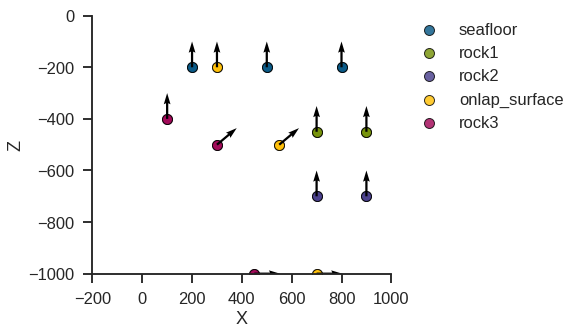

In [4]:
gp.plot.plot_data(geo_model)

In [5]:
gp.activate_interactive_df(geo_model)

In [6]:
#geo_model.qi.get('orientations')

In [7]:
geo_model.qi.get('surfaces')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [8]:
geo_model.qi.get('series')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [9]:
geo_model.series

,order_series,BottomRelation
seafloor_series,1,Erosion
right_series,2,Onlap
onlap_series,3,Erosion
left_series,4,Erosion
basement,5,Erosion


In [10]:
geo_model.qi.get('surface_points')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

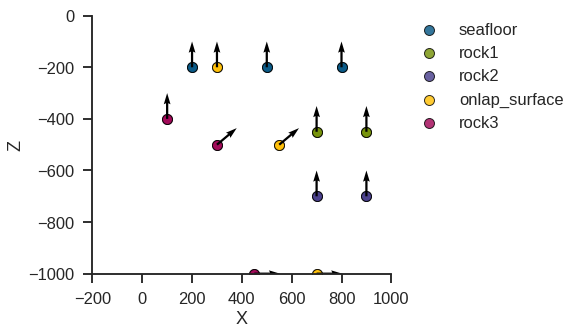

In [11]:
gp.plot.plot_data(geo_model, direction='y')

In [12]:
gp.set_interpolation_data(geo_model, verbose=[])

Compiling theano function...
Compilation Done!


,values
dtype,float64
output,geology
theano_optimizer,fast_compile
device,cpu
verbosity,[]


In [13]:
geo_model.set_regular_grid([-200,1000,-500,500,-1000,0], [50,50,50])

Grid Object. Values: 
array([[-188., -490., -990.],
       [-188., -490., -970.],
       [-188., -490., -950.],
       ...,
       [ 988.,  490.,  -50.],
       [ 988.,  490.,  -30.],
       [ 988.,  490.,  -10.]])

In [14]:
#geo_model.update_to_interpolator()

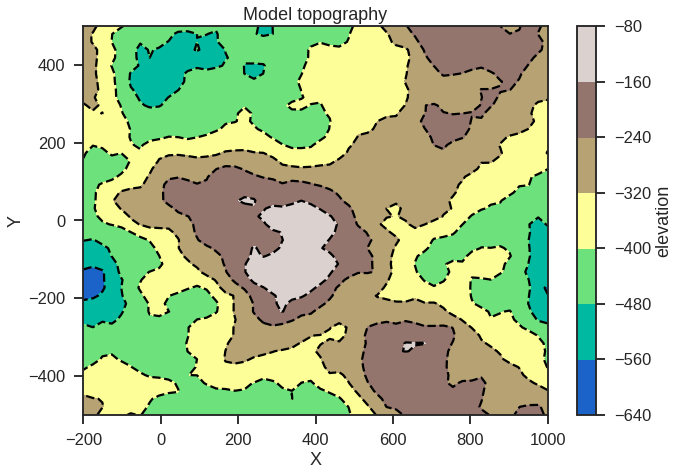

In [15]:
geo_model.set_topography(d_z=np.array([-600,-100]))

In [16]:
geo_model.grid.set_active('topography')

In [17]:
geo_model.grid.active_grids[2]

True

In [18]:
l0, l1 = geo_model.grid.get_grid_args('topography')

In [19]:
s = gp.compute_model(geo_model, compute_mesh=True, debug=False)

In [20]:
geo_model.solutions.topography_map

array([[5., 5., 5., ..., 2., 2., 2.]])

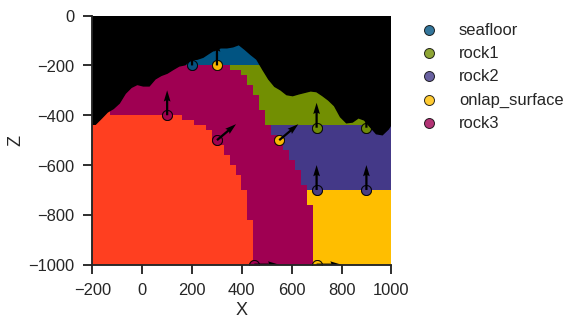

In [21]:
gp.plot.plot_section(geo_model, 25, plot_data=True)

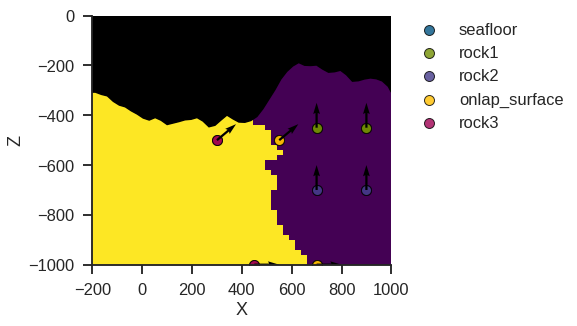

In [22]:
gp.plot.plot_section(geo_model, 2, block=geo_model.solutions.mask_matrix_pad[3], plot_data=True,
                    )

In [23]:
geo_model.series

,order_series,BottomRelation
seafloor_series,1,Erosion
right_series,2,Onlap
onlap_series,3,Erosion
left_series,4,Erosion
basement,5,Erosion


In [75]:
vtkp = gp.plot.plot_3D(geo_model, render_surfaces=False, render_data=False)

holding... Use vtk.resume to go back to the interactive window


In [25]:
a = vtkp.topography_surface.GetMapper()


In [54]:
mcolors.hex2color(geo_model.surfaces.df.set_index('id')['color'][1])

(0.00392156862745098, 0.32941176470588235, 0.5098039215686274)

array([[5, 5, 5, ..., 2, 2, 2]])

In [84]:
import vtk
import matplotlib.colors as mcolors

colors = vtk.vtkUnsignedCharArray()
colors.SetNumberOfComponents(3)
colors.SetName("Colors")
for i in np.round(geo_model.solutions.topography_map).astype(int):

    colors.InsertNextTuple(mcolors.hex2color(geo_model.surfaces.df.set_index('id')['color'][i]))

ValueError: Invalid RGBA argument: id
5    #9f0052
5    #9f0052
5    #9f0052
5    #9f0052
5    #9f0052
5    #9f0052
5    #9f0052
5    #9f0052
5    #9f0052
5    #9f0052
5    #9f0052
5    #9f0052
5    #9f0052
5    #9f0052
5    #9f0052
5    #9f0052
5    #9f0052
5    #9f0052
5    #9f0052
5    #9f0052
5    #9f0052
5    #9f0052
5    #9f0052
5    #9f0052
5    #9f0052
5    #9f0052
3    #443988
2    #728f02
2    #728f02
2    #728f02
      ...   
5    #9f0052
5    #9f0052
5    #9f0052
5    #9f0052
5    #9f0052
5    #9f0052
5    #9f0052
5    #9f0052
2    #728f02
2    #728f02
2    #728f02
2    #728f02
2    #728f02
2    #728f02
2    #728f02
2    #728f02
1    #015482
1    #015482
1    #015482
1    #015482
2    #728f02
2    #728f02
2    #728f02
2    #728f02
2    #728f02
2    #728f02
2    #728f02
2    #728f02
2    #728f02
2    #728f02
Name: color, Length: 2500, dtype: object

In [ ]:
# Create the color map
colorLookupTable = vtk.vtkLookupTable()
colorLookupTable.SetTableRange(minz, maxz)
colorLookupTable.Build()

# Generate the colors for each point based on the color map
colors = vtk.vtkUnsignedCharArray()
colors.SetNumberOfComponents(3)
colors.SetName("Colors")

print( "There are "+str(outputPolyData.GetNumberOfPoints())+" points.")

for i in range(0, outputPolyData.GetNumberOfPoints()):
p= 3*[0.0]
outputPolyData.GetPoint(i,p)

dcolor = 3*[0.0]
colorLookupTable.GetColor(p[2], dcolor);
print( "dcolor: "
          + str(dcolor[0]) + " "
          + str(dcolor[1]) + " "
          + str(dcolor[2]))
color=3*[0.0]
for j in range(0,3):
  color[j] = int(255.0 * dcolor[j])

print("color: "
       + str(color[0]) + " "
       + str(color[1]) + " "
       + str(color[2]))
try:
    colors.InsertNextTupleValue(color)
except AttributeError:
    # For compatibility with new VTK generic data arrays.
    colors.InsertNextTypedTuple(color)

In [33]:
import vtk
from vtk.util.numpy_support import numpy_to_vtk

In [39]:
numpy_to_vtk?

In [40]:
numpy_to_vtk(geo_model.solutions.topography_map)

/home/miguel/anaconda3/lib/python3.6/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


(vtkCommonCorePython.vtkDoubleArray)0x7fc347fe1d68

In [79]:
out_pd = vtkp._topography_delauny.GetOutput()
out_pd.GetPointData().SetScalars(colors)

0

In [80]:
vtkp.interactor.Render()


In [74]:
vtkp.resume()

closing vtk


In [62]:
o = out_pd.GetPointData()
o.GetScalars()

(vtkCommonCorePython.vtkUnsignedCharArray)0x7fc33dadbee8

In [ ]:
out_pd.GetPointData().SetScalars

In [ ]:
out_pd.GetPointData().SetScalars

In [63]:
vtkp.render_topography()

In [ ]:
a = vtkp.topography_surface.GetMapper()
a.GetInputConnection(0, 0)

In [ ]:
b = vtkp._topography_polydata.Get()


In [ ]:
break

In [ ]:
vtkp.render_topography()

In [ ]:
vtkp.restart()

In [ ]:
# vtkp.set_topography()

In [ ]:
geo_model.set_topography(d_z=np.array([-800,-600]))#, plot_object= vtkp)

In [ ]:
gp.plot.plot_section(geo_model, 25, direction='y',
                     block=~geo_model.solutions.grid.regular_grid.mask_topo,
                show_topo=False)

In [ ]:
gp.plot.plot_section(geo_model, 2, direction='y',
                     block=geo_model.solutions.mask_matrix[1].reshape(50,50,50) * ~geo_model.grid.regular_grid.mask_topo,
                show_topo=False)

In [ ]:
geo_model.solutions.padding_mask_matrix()

In [ ]:
gp.plot.plot_section(geo_model, 2, direction='y', block=geo_model.solutions.mask_matrix[1],
                show_topo=False)

In [ ]:
gp.plot.plot_section(geo_model, 2, direction='y', block=geo_model.solutions.mask_matrix_pad[2].T,
                show_topo=False)

In [ ]:
gp.compute_model(geo_model)

In [ ]:
vtkp = gp.plot.plot_3D(geo_model)

In [ ]:
vtkp.set_real_time_on()

In [ ]:
geo_model.set_topography(d_z=np.array([-600,-100]), plot_object= vtkp)

In [ ]:
vtkp.resume()

Save model if any changes were made:

In [ ]:
# geo_model.save_model('Tutorial_ch1-8_Onlap_relations', path= '../data/gempy_models',)